#What is Deep Learning
Deep learning is a branch of machine learning that uses artificial neural networks to learn from data. Unlike traditional machine learning, which often requires data to be pre-processed and labeled by humans, deep learning allows algorithms to learn increasingly complex features from unstructured data, such as images, sound, or text. Deep learning is used in many fields such as image recognition, speech recognition, machine translation, and fraud detection.

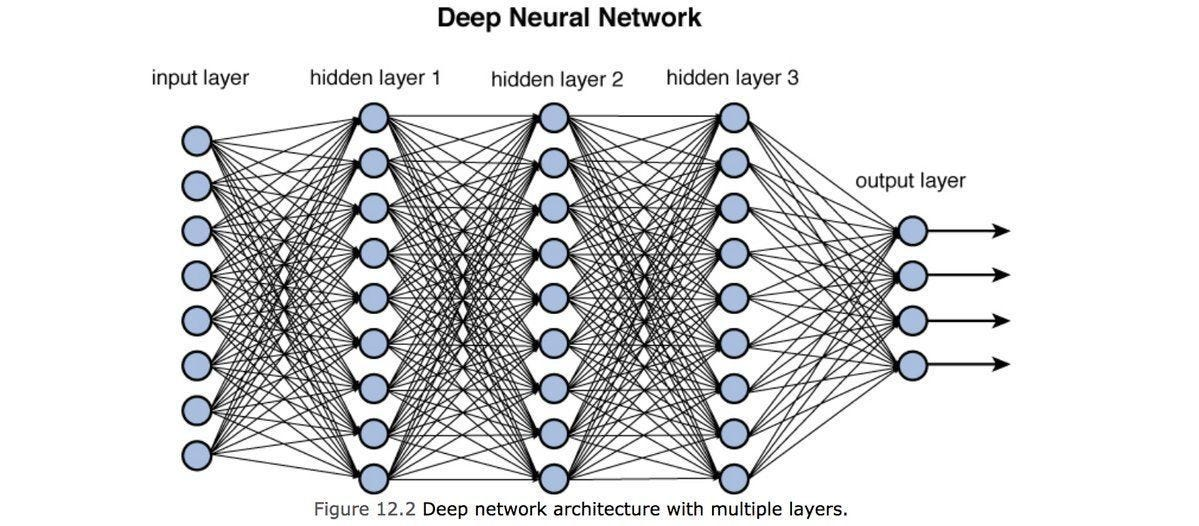

In [ ]:
#Example code of a neural network using Tensorflow
#we import Tensorflow
import tensorflow as tf

#We import our data
#We'll use the MNIST number dataset from Kaggle (comes by default with TF)
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#We build our Neural Network model with sequential layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

#We compile our model and define the hyperparameters to use
model.compile(optimizer='adam',
              loss="mae",
              metrics=['accuracy'])

#We train the model on the MNIST dataset
model.fit(x_train, y_train, epochs=5)

In [ ]:
#A summary of the model
model.fit(x_train, y_train, epochs=5)

In [ ]:
#We evaluate its performance using the define metrics
model.evaluate(x_test,  y_test, verbose=2)

#What is a Neural Network Autoencoder

An autoencoder is a type of artificial neural network that is used for data compression. It consists of two main parts: the encoder and the decoder. The encoder takes the data as input and reduces it to a more compact representation, while the decoder takes this representation and decodes it to retrieve the original data. Autoencoders are often used for image compression, where the goal is to reduce the size of an image while retaining important features. They are also used for anomaly detection, where they can be trained to recognize normal data patterns and signal data that deviate from these patterns.

The encoder part of the autoencoder takes the input data (in this case, a 28x28 grayscale image) and compresses it into a smaller representation, which is called the encoding. This is done by passing the input data through a series of convolutional layers and max pooling layers, which extract features from the input and reduce its spatial dimensions.

The decoder part of the autoencoder takes the encoding produced by the encoder and attempts to reconstruct the original input data. This is done by passing the encoding through a series of convolutional layers and upsampling layers, which gradually increase the spatial dimensions of the encoding until it matches the size of the original input data. The final layer of the decoder is a convolutional layer with a single channel and sigmoid activation, which produces a reconstructed image that should closely resemble the original input.

During training, the autoencoder is trained to minimize the reconstruction loss, which measures the difference between the reconstructed image and the original input image. By doing so, the autoencoder learns to encode the input data into a compact representation that retains important features of the input, while discarding irrelevant or redundant information.

The difference between an autoencoder and a normal neural network is that a normal neural network is typically used for supervised learning tasks, where there is a labeled dataset with inputs and corresponding outputs. The neural network learns to map the input to the correct output by minimizing a loss function that measures the difference between the predicted output and the true output. In contrast, an autoencoder is an unsupervised learning technique that learns to compress and reconstruct data without using explicit labels.

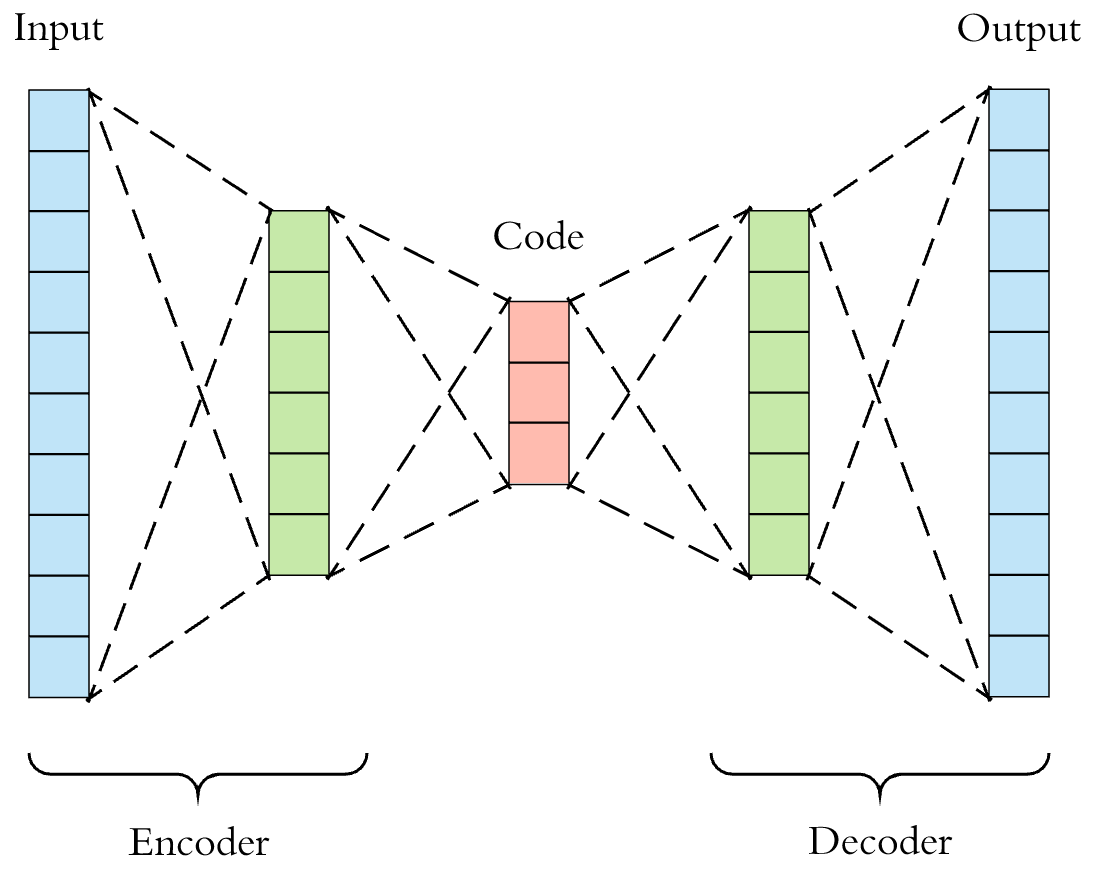

The red squares in the image above represent what's called a model's bottleneck, it is the layer with the smallest dimensions, the challenge that is faced by models is compressing the image to this bottleneck size while still keeping a coherent image and keeping the needed features, this is done by the encoder, then after the images is parsed through this layer, the model needs to rescale the image up, this is where the decoder part comes in, where it uses the weights (which are essentially information from older photos) to rebuild a sharper larger scale image, the final decoded image won't be an exact copy of the original but a very close match. The reason why we simply don't keep a copy of the image for every layer is because machines have limited Video Memory.

#Dataset Used
For the following case, we'll be using the MNIST Fashion dataset from Kaggle: https://www.kaggle.com/datasets/zalando-research/fashionmnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels: Since Autoencoders only concern unsupervised models we don't need to use the labels of the data

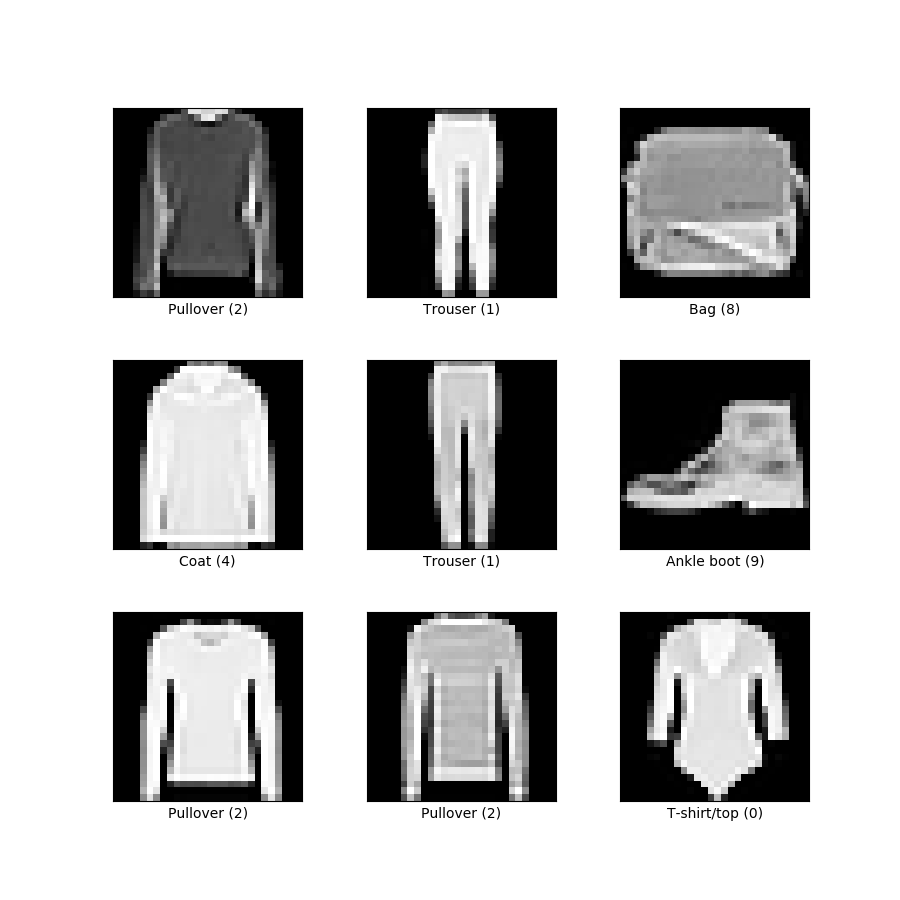

#Applying autoencoding on the MNIST Fashion dataset

In [101]:
#Import the needed libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [134]:
#import the dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
#normalize the images by turning the values of each image from [[0,255]] to [0,1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
#We look at the shape of the data
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [123]:
latent_dim = 64 #Size of the bottleneck layer that is explained above
#Autoencoder class
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__() 
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([ #encoder portion
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([ #decoder portion
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [124]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError()) #we compile the model using the adam optimizer and Mean Squared Error loss function

In [125]:
#We train the model over 10 epochs
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/10
1875/1875 [==============================] - 90s 47ms/step - loss: 0.0235 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 4/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 80s 43m

#Evalutation
Loss value: 0.0088 <br>
Training duration: 440 seconds <br>
Memory used: approx 7GB on colab

In [136]:
encoded_imgs = autoencoder.encoder(x_test).numpy() #encoded images
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy() #decoded images

#Results

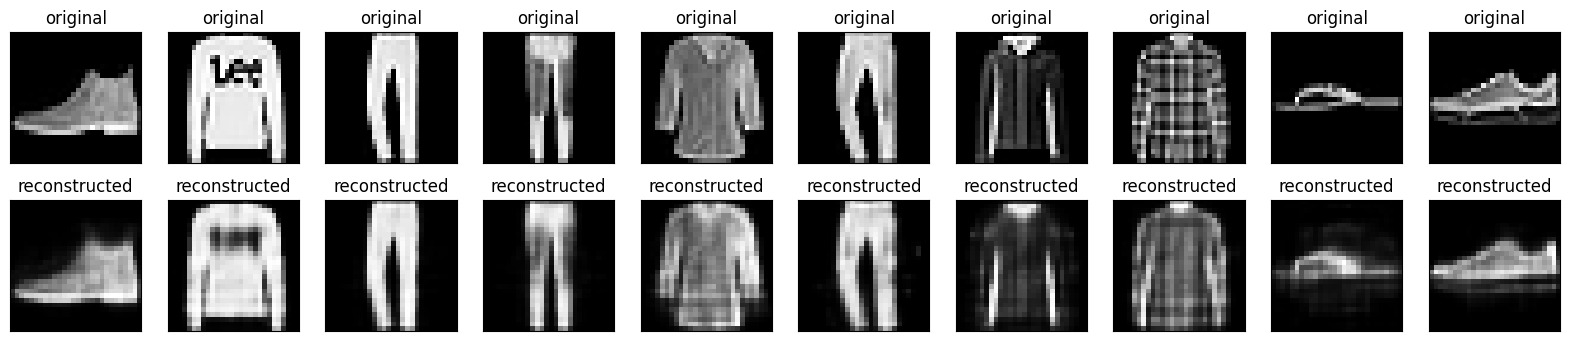

In [139]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

As we can see above the autoencoder succesfully compressed the images to size 64 pixels then reconstructed a full size image using the trained neural network, the output isn't perfect hence why the loss isn't zero (0.0088)

What we notice most is that the rebuilt images have their features focused on which is something normal compression algorithms can't do since they have a static code, in the case of the white shirt for example the shirt is outlined further and the writing is blackened, however all other uneeded detail is lost

#Why use an Autoencoder

Autoencoders have a wide range of applications in various fields, some of which include:

Image and Video Compression: Autoencoders can be used to compress large images or videos by reducing their dimensionality while retaining the most important features. This can help to reduce storage space, bandwidth requirements, and transmission times.

Anomaly Detection: Autoencoders can be used for anomaly detection in a variety of contexts, such as fraud detection, intrusion detection, and medical diagnosis. By training an autoencoder on normal data and then using it to reconstruct new data, anomalies or outliers can be identified as those data points that have a large reconstruction error.

Data Denoising: Autoencoders can be used to remove noise from data, such as images or audio signals, by training the autoencoder on noisy data and then using it to reconstruct the original data without noise.

Feature Extraction: Autoencoders can be used to extract useful features from raw data, such as images or text, by training the autoencoder to compress the input data into a lower-dimensional representation. This can be particularly useful in machine learning tasks such as classification and clustering.

Image Generation: Autoencoders can be used to generate new images that are similar to the training data by training the autoencoder to generate outputs that are close to the original inputs. Variational Autoencoders (VAEs) are a type of autoencoder that can generate new images by sampling from the learned latent space.

#Image compression
In our case (example above) we used autoencoders for image compression, they are commonly used for this, as they can efficiently reduce the dimensionality of the input image while retaining its most important features. The basic idea is to train an autoencoder on a large dataset of images, and then use it to compress new images into a lower-dimensional representation that can be easily stored and transmitted.

In the case of image compression, the autoencoder typically consists of an encoder and a decoder. The encoder takes the input image and compresses it into a lower-dimensional representation, also known as the latent space. The size of the latent space is typically much smaller than the size of the input image, which means that the input image is compressed into a more compact representation. The decoder then takes the compressed representation and reconstructs the original image. The output of the decoder is an approximation of the original image, but with some loss of detail due to the compression.

The quality of the compressed image depends on the size of the latent space and the capacity of the encoder and decoder networks. A smaller latent space and simpler encoder and decoder networks may result in more loss of detail, but also more compression, while a larger latent space and more complex networks may result in less compression but better reconstruction quality.